<a href="https://colab.research.google.com/github/poonamaswani/DataScienceAndAI/blob/main/CAM_DS_C101_Demo_2_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this demonstration set up and ready to use.


# Demonstration 2.2.2 Pitfalls and best practices in interpreting correlation

Follow the demonstration to learn about the concept of Anscombe’s Quartet. In this video, you will learn how to:
- understand the concept of Anscombe’s Quartet
- understand the impact of outliers and the value of visualisation
- recognise the limitations of summary statistics.


In [ ]:
# Import the required libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load Anscombe's quartet data.
anscombe = sns.load_dataset("anscombe")

# View the output.
print(anscombe.shape)
anscombe.head(20)

(44, 3)


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


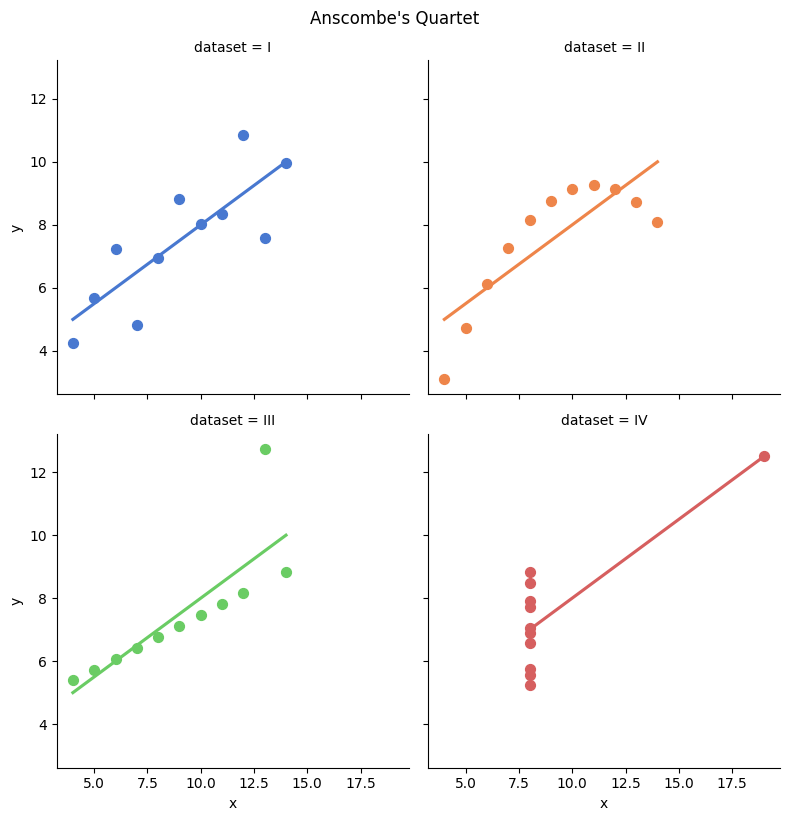

In [ ]:
# Plot the four data sets of Anscombe's quartet.
g = sns.lmplot(x="x",
               y="y",
               col="dataset",
               hue="dataset",
               data=anscombe,
               col_wrap=2,
               ci=None,
               palette="muted",
               height=4,
               scatter_kws={"s": 50, "alpha": 1})

g.fig.suptitle("Anscombe's Quartet", y=1.02)

plt.show()

In [ ]:
# Compare the statistical data.
# Calculate mean, variance, and correlation for each data set.
statistics = []

for dataset in anscombe['dataset'].unique():
    subset = anscombe[anscombe['dataset'] == dataset]
    mean_x = subset['x'].mean()
    mean_y = subset['y'].mean()
    var_x = subset['x'].var()
    var_y = subset['y'].var()
    corr = subset['x'].corr(subset['y'])

    statistics.append({'Dataset': dataset,
                       'Mean of x': mean_x,
                       'Mean of y': mean_y,
                       'Variance of x': var_x,
                       'Variance of y': var_y,
                       'Correlation between x and y': corr})

# Display the statistics as a DataFrame.
statistics_df = pd.DataFrame(statistics)
statistics_df

,Dataset,Mean of x,Mean of y,Variance of x,Variance of y,Correlation between x and y
0,I,9.0,7.500909,11.0,4.127269,0.816421
1,II,9.0,7.500909,11.0,4.127629,0.816237
2,III,9.0,7.500000,11.0,4.122620,0.816287
3,IV,9.0,7.500909,11.0,4.123249,0.816521


# Key information
The demonstrations illustrated that despite visual differences, data sets can have nearly identical statistical properties (mean, variance, correlation, and linear regression lines). This highlights the importance of visualising data and not solely relying on statistical metrics.

## Reflect
What are the practical applications of this technique?

For businesses, relying only on averages or correlations could lead to wrong decisions.

*   A telecom might see “average wait time = 5 minutes” — but maybe some customers wait 1 minute and others 30 minutes (big difference in experience!).
*   A retailer might see “average sales are steady” — but in reality, one region is booming while another is collapsing.

Anscombe's Quartet reminds us that data visualisation along with statistical analysis together gives the full picture.

